In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [12]:
# Load data
df = pd.read_csv("data_preprocessed.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.524780,1.0,0.792992,0.622545,0.666667,1.0,0.465753,0.625000,0.0,0.0,0.711022,1.0,0.338009,0.000000,0.666667,0.75,3
1,0.258801,0.0,0.297105,0.325484,0.666667,1.0,0.023310,0.507414,0.0,0.0,0.042645,1.0,0.000000,0.646730,0.666667,0.75,2
2,0.475505,1.0,0.723608,0.355762,0.666667,1.0,0.285714,0.000000,0.0,0.0,0.362750,1.0,0.498366,0.400000,0.000000,0.75,5
3,0.424484,1.0,0.544808,0.426051,1.000000,1.0,0.285714,0.625000,0.0,0.0,0.555116,1.0,0.720433,0.514847,0.666667,0.75,2
4,0.499824,1.0,0.749063,0.623040,0.666667,1.0,0.544648,0.528761,0.0,0.0,0.520723,1.0,0.249183,0.144864,0.666667,0.75,3


Split kedua (sesudah preprocessing):

Kamu sudah anggap dataset siap pakai (hasil SMOTE), lalu mau bagi ulang menjadi train/test untuk pemodelan.

In [13]:
# Pisahkan fitur dan target
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# Split data untuk modeling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [14]:
# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

In [15]:
# Untuk menyimpan hasil evaluasi
results = {}

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.82      0.91      0.86        74
           2       0.84      0.82      0.83        74
           3       0.99      0.93      0.96        74
           4       0.91      1.00      0.95        74
           5       0.91      0.78      0.84        74
           6       0.83      0.84      0.83        74

    accuracy                           0.89       517
   macro avg       0.89      0.89      0.89       517
weighted avg       0.89      0.89      0.89       517


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        73
           1       0.79      0.95      0.86        74
           2       0.96      0.88      0.92        74
           3       0.97      0.95      0.96        74
           4       0.99      1.00      0.99        74
           5       0.90      0.8

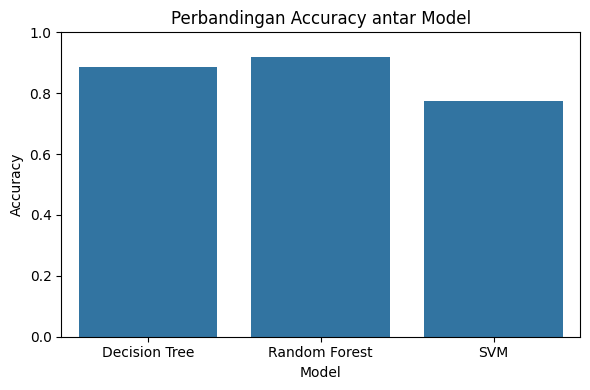

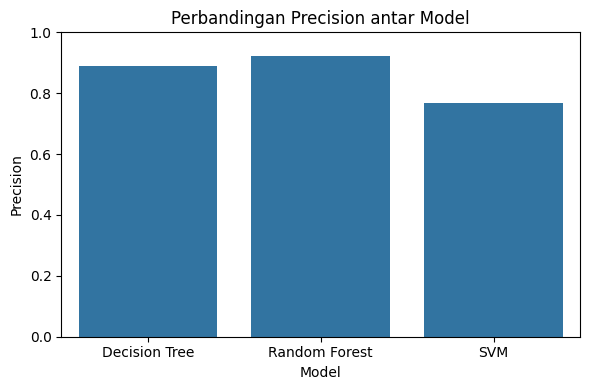

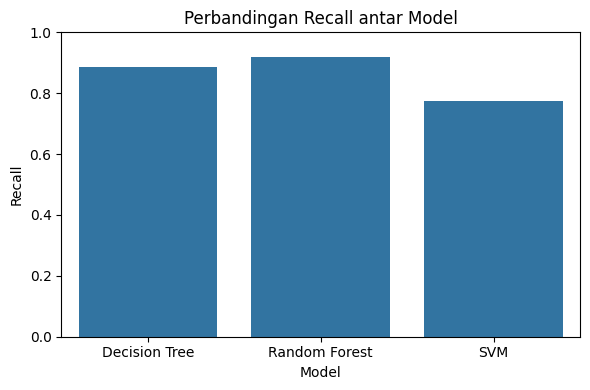

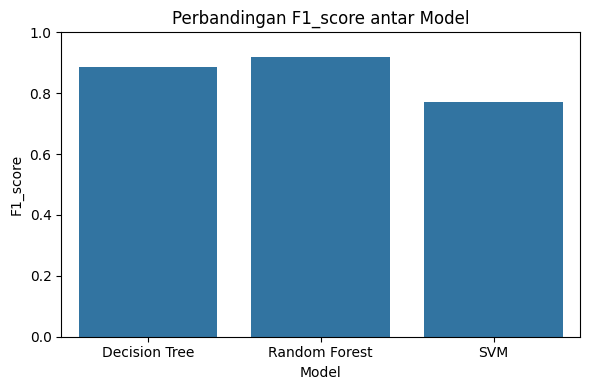

In [18]:
# Visualisasi perbandingan metrik
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.title(f'Perbandingan {metric.capitalize()} antar Model')
    sns.barplot(x=list(results.keys()), y=[results[m][metric] for m in results])
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()

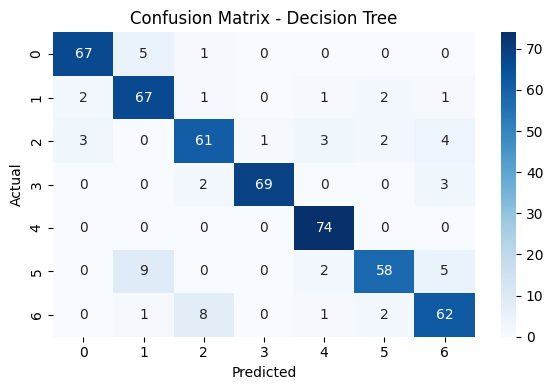

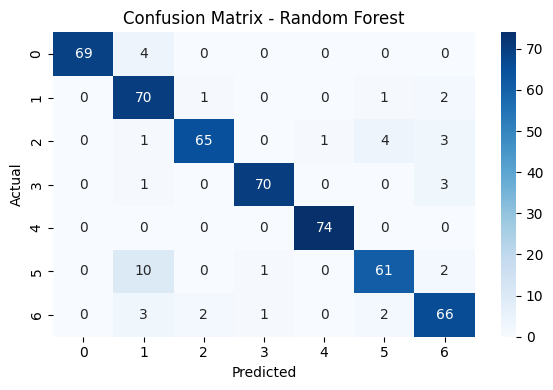

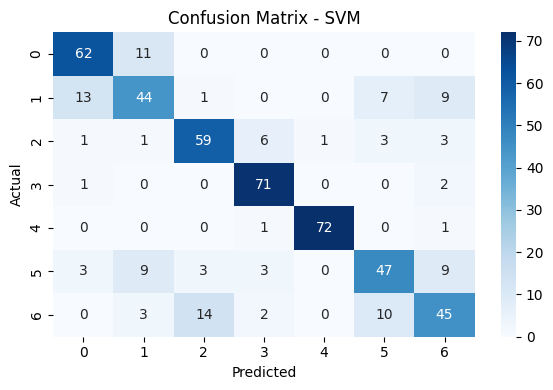

In [19]:
# Visualisasi confusion matrix
for name in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Kesimpulan Modeling:

Dari ketiga model yang diuji (Decision Tree, Random Forest, dan SVM), terlihat bahwa model Random Forest memberikan performa terbaik secara keseluruhan, dengan nilai akurasi, presisi, recall, dan F1-score yang lebih tinggi dibandingkan Decision Tree dan SVM.